<a href="https://colab.research.google.com/github/NaveenNKD2001/Image-classification/blob/main/Image_Classification_Cutom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

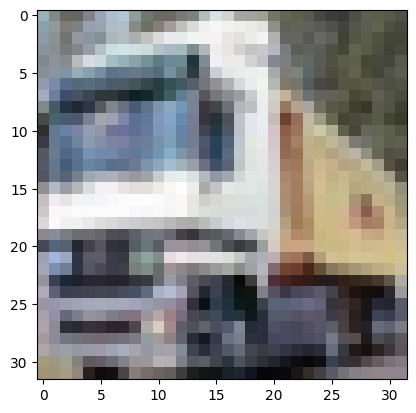

In [5]:
plt.imshow(train_images[1])
plt.show()

In [6]:
def augmentation(batch_images):
  batch_images=tf.image.random_flip_left_right(batch_images)
  batch_images=tf.image.rot90(batch_images,k=tf.random.uniform(shape=[],minval=0,maxval=4,dtype=tf.int32))

  return batch_images.numpy()

In [7]:
n_train_images=train_images/255.0

augmented_train_images=augmentation(train_images)

n_augmented_train_images=augmented_train_images/255.0

n_test_images=test_images/255.0

In [8]:
def cnn_model_creation():
  model_CNN=tf.keras.models.Sequential()

  model_CNN.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=(32,32,3)))
  model_CNN.add(tf.keras.layers.BatchNormalization())
  model_CNN.add(tf.keras.layers.Dropout(0.1))
  model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

  model_CNN.add(tf.keras.layers.Conv2D(filters=128,activation='relu',kernel_size=3))
  model_CNN.add(tf.keras.layers.BatchNormalization())
  model_CNN.add(tf.keras.layers.Dropout(0.1))
  model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

  model_CNN.add(tf.keras.layers.Conv2D(filters=256,activation='relu',kernel_size=3))
  model_CNN.add(tf.keras.layers.BatchNormalization())
  model_CNN.add(tf.keras.layers.Dropout(0.1))
  model_CNN.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

  model_CNN.add(tf.keras.layers.Flatten())

  model_CNN.add(tf.keras.layers.Dropout(0.5))

  model_CNN.add(tf.keras.layers.Dense(units=256,activation='relu'))
  model_CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
  model_CNN.add(tf.keras.layers.Dense(units=64,activation='relu'))

  model_CNN.add(tf.keras.layers.Dense(units=10,activation='softmax'))

  model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  return model_CNN

#Without augmentation and without Normalized Input and output

In [9]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath="model_CNN.keras",monitor='val_accuracy',mode='max',save_best_only=True)
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,patience=3,monitor='val_loss',min_lr=0.0000001)

In [10]:
model_CNN=cnn_model_creation()
history=model_CNN.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 31s 12ms/step - loss: 1.5086 - accuracy: 0.4555 - val_loss: 1.5103 - val_accuracy: 0.4915 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1371 - accuracy: 0.5965 - val_loss: 1.2485 - val_accuracy: 0.5851 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9780 - accuracy: 0.6583 - val_loss: 1.0115 - val_accuracy: 0.6517 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8844 - accuracy: 0.6925 - val_loss: 1.0258 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8103 - accuracy: 0.7192 - val_loss: 0.9633 - val_accuracy: 0.6941 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7540 - accuracy: 0.7391 - val_loss: 0.9305 - val_accuracy: 0.6886 - lr: 0.0010
Epoch 7/50
1563/1563 [=============================

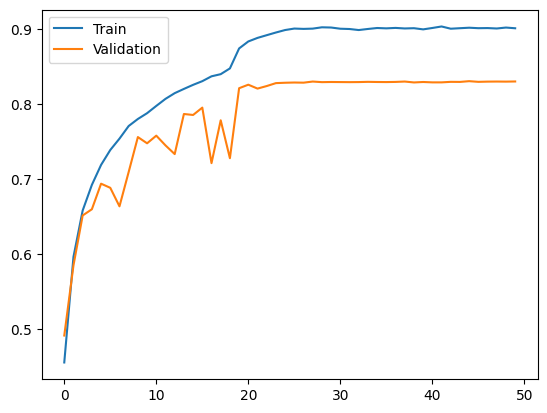

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [12]:
model_CNN.load_weights('model_CNN.keras')
model_CNN.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.6034 - accuracy: 0.8309


[0.6033796072006226, 0.8309000134468079]

In [13]:
y_pred=model_CNN.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 3ms/step


In [14]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.8309
0.8336118
0.8309


#Normalized input and Normalised output



In [15]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=f"model_CNN_n.keras",monitor='val_accuracy',mode='max',save_best_only=True)

In [16]:
model_CNN_n=cnn_model_creation()
history=model_CNN_n.fit(n_train_images,train_labels,validation_data=(n_test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 1.5021 - accuracy: 0.4555 - val_loss: 2.3097 - val_accuracy: 0.3706 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1289 - accuracy: 0.6028 - val_loss: 1.3988 - val_accuracy: 0.5193 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9727 - accuracy: 0.6621 - val_loss: 0.9576 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8711 - accuracy: 0.6959 - val_loss: 0.9412 - val_accuracy: 0.6740 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8058 - accuracy: 0.7212 - val_loss: 0.8135 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7496 - accuracy: 0.7409 - val_loss: 0.9120 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================

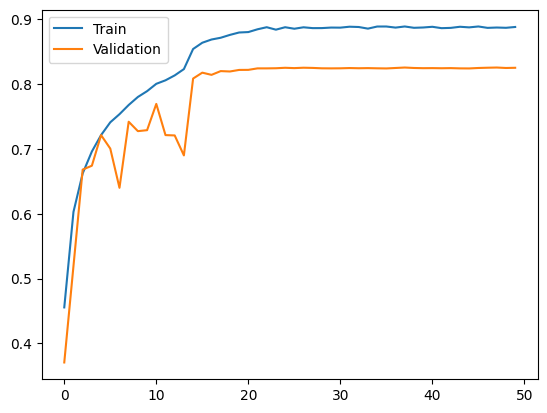

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [18]:
model_CNN_n.load_weights('model_CNN_n.keras')
model_CNN_n.evaluate(n_test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5829 - accuracy: 0.8254


[0.5828569531440735, 0.8253999948501587]

In [19]:
y_pred=model_CNN_n.predict(n_test_images)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [20]:
print(accuracy_score(y_pred,test_labels))
print(precision_score(y_pred,test_labels,average='weighted'))
print(recall_score(y_pred,test_labels,average='weighted'))

0.8254
0.8270603000000001
0.8254


#Augmented Input


In [21]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='model_CNN_aug.keras',mode='max',monitor='val_accuracy',save_best_only=True)

In [22]:
model_cnn_aug=cnn_model_creation()
history=model_cnn_aug.fit(augmented_train_images,train_labels,validation_data=(test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 1.4418 - accuracy: 0.4783 - val_loss: 2.1814 - val_accuracy: 0.2964 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0751 - accuracy: 0.6209 - val_loss: 1.9184 - val_accuracy: 0.3379 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9357 - accuracy: 0.6707 - val_loss: 2.4833 - val_accuracy: 0.2802 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8454 - accuracy: 0.7023 - val_loss: 2.3611 - val_accuracy: 0.2820 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7834 - accuracy: 0.7275 - val_loss: 2.5998 - val_accuracy: 0.3144 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6440 - accuracy: 0.7735 - val_loss: 2.1902 - val_accuracy: 0.3640 - lr: 1.0000e-04
Epoch 7/50
1563/1563 [==========================

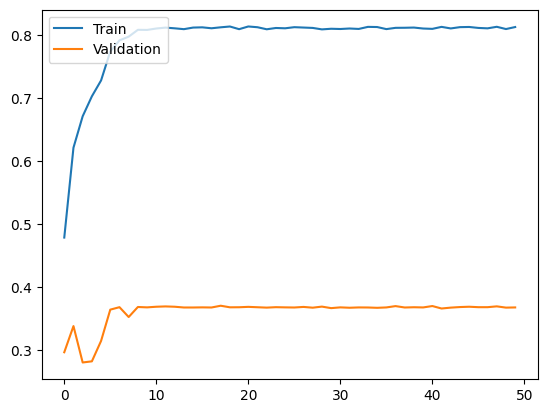

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [24]:
model_cnn_aug.load_weights('model_CNN_aug.keras')
model_cnn_aug.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.3777 - accuracy: 0.3702


[2.377675771713257, 0.3702000081539154]

#Augmented and normalized input

In [25]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_CNN_aug_n.keras',monitor='val_accuracy',mode='max',save_best_only=True)

In [26]:
model_cnn_aug_n=cnn_model_creation()
history=model_cnn_aug_n.fit(n_augmented_train_images,train_labels,validation_data=(n_test_images,test_labels),epochs=50,callbacks=[checkpoint,reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 1.4379 - accuracy: 0.4816 - val_loss: 2.4543 - val_accuracy: 0.2616 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0951 - accuracy: 0.6125 - val_loss: 2.1418 - val_accuracy: 0.3001 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9550 - accuracy: 0.6628 - val_loss: 2.2883 - val_accuracy: 0.3098 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8679 - accuracy: 0.6966 - val_loss: 2.3056 - val_accuracy: 0.3011 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7985 - accuracy: 0.7242 - val_loss: 2.4981 - val_accuracy: 0.3113 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6524 - accuracy: 0.7712 - val_loss: 2.1651 - val_accuracy: 0.3697 - lr: 1.0000e-04
Epoch 7/50
1563/1563 [==========================

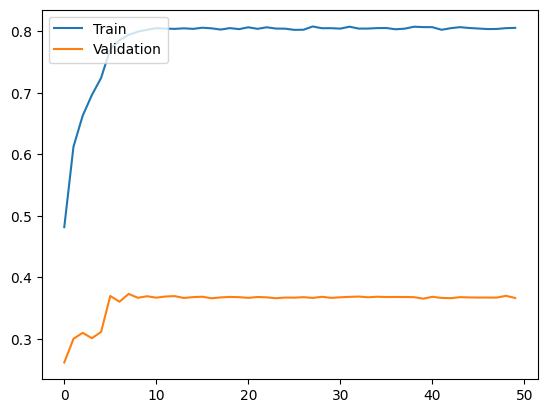

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [28]:
model_cnn_aug_n.load_weights('model_CNN_aug_n.keras')
model_cnn_aug_n.evaluate(n_test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.2344 - accuracy: 0.3731


[2.23439884185791, 0.37310001254081726]